In [1]:
import tensorflow as tf
from utils import *
import visualkeras

In [6]:
train_ds, valid_ds = load_dataset_tensorflow(subset="both",validation_split=0.2)

Found 1650 files belonging to 5 classes.
Using 1320 files for training.
Using 330 files for validation.


In [7]:
def get_base_model():
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Rescaling(1./255))
    model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D())
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D((2, 2)))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(128, activation='relu'))
    model.add(tf.keras.layers.Dense(5, activation='softmax'))
    return model


In [16]:
model = get_base_model()
model.compile(optimizer='adam', loss="categorical_crossentropy", metrics=['accuracy'])
history = model.fit(train_ds, validation_data=valid_ds, epochs=15)

Epoch 1/15


42/42 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 0.2880 - loss: 31.5399 - val_accuracy: 0.2576 - val_loss: 1.6463
Epoch 2/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 60s 1s/step - accuracy: 0.3356 - loss: 3.7693 - val_accuracy: 0.1273 - val_loss: 2.3519
Epoch 3/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 60s 1s/step - accuracy: 0.3264 - loss: 2.9996 - val_accuracy: 0.1697 - val_loss: 2.1247
Epoch 4/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 85s 2s/step - accuracy: 0.3431 - loss: 1.8047 - val_accuracy: 0.1697 - val_loss: 2.8215
Epoch 5/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 104s 2s/step - accuracy: 0.3444 - loss: 1.5225 - val_accuracy: 0.1939 - val_loss: 2.7788
Epoch 6/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 127s 2s/step - accuracy: 0.3532 - loss: 1.5103 - val_accuracy: 0.1636 - val_loss: 4.9000
Epoch 7/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 29s 690ms/step - accuracy: 0.3395 - loss: 1.5445 - val_accuracy: 0.1788 - val_loss: 2.8356
Epoch 8/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 29s 685ms/step - accuracy: 0.3635 - loss: 1.4914 - val_accuracy: 0.2424 - val_loss: 2

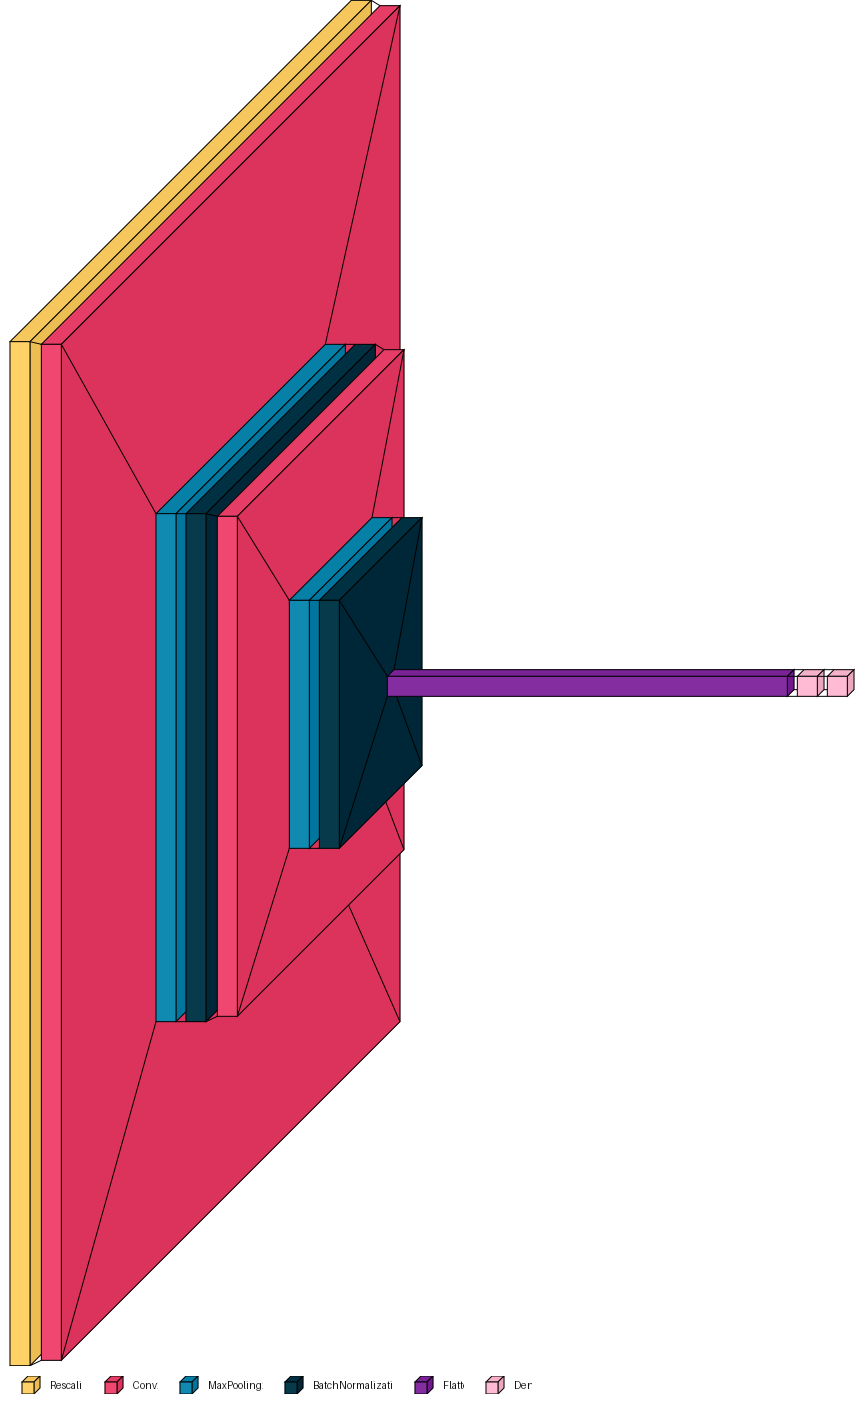

In [17]:

visualkeras.layered_view(model,legend=True)

In [18]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_3 (Rescaling)         │ (None, 256, 256, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 254, 254, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 127, 127, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 125, 125, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 62, 62, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 123008)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │    15,745,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 47,266,609 (180.31 MB)

 Trainable params: 15,755,493 (60.10 MB)

 Non-trainable params: 128 (512.00 B)

 Optimizer params: 31,510,988 (120.20 MB)

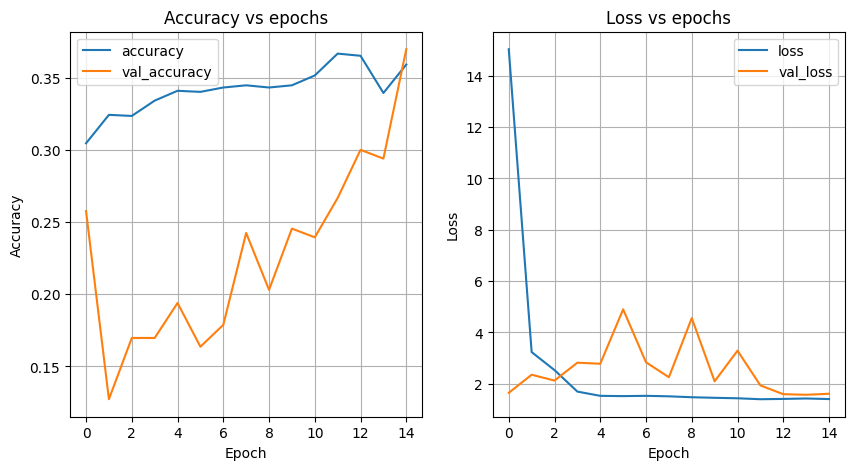

In [19]:
plot_accuraccy_loss(history)